Exporting CSV and Converting it to Pandas Dataframe
---

In [87]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

In [88]:
## csv to dataframe
df = pd.read_csv('IS.csv')

df

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Dünya Hain,Batuflex,61,145,"turkish hip hop, turkish trap",Hip Hop,Dünya Hain,2021-06-25,02:25,...,10,-10,A Major,4,2021-12-05,0qNeSaQsn2MzBppf6T8GdR,Batuflex,11B,https://p.scdn.co/mp3-preview/9deeabe2cfd04a08...,https://i.scdn.co/image/ab67616d00004851229426...
1,2,KISKANMA,Sdrk,0,105,new school turkce rap,Hip Hop,KISKANMA,2021-07-30,01:36,...,10,-11,A Major,4,2021-12-05,3aBWFcUEAXHaBFbrMFtc1u,Wovie,11B,NaN,https://i.scdn.co/image/ab67616d00004851c40ec2...
2,3,Olabilir,MERO,0,140,german hip hop,Hip Hop,UNIKAT,2019-09-27,03:30,...,10,-7,F#/G♭ Major,4,2021-12-05,3atDfMSYYjnC6R90eijbvf,Groove Attack TraX,2B,NaN,https://i.scdn.co/image/ab67616d00004851708ab5...
3,4,Baba,"Ayaz Erdoğan,Mengelez",0,137,"turkish trap pop,",Pop,Baba,2021-01-29,03:35,...,10,-9,A#/B♭ Minor,4,2021-12-05,4WVOnhv2a3vvBAzHbmdGHW,Musixon,3A,NaN,https://i.scdn.co/image/ab67616d00004851156a3f...
4,5,BENIM HAYALLER,"Luciano,Ezhel",58,101,"german drill, german hip hop, turkish hip hop,...","Latin, Hip Hop",AQUA,2021-07-01,03:02,...,10,-7,C Minor,4,2021-12-05,6UhWOBZVHsuZHKJpQJYeWW,URBAN,5A,NaN,https://i.scdn.co/image/ab67616d000048519f04da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,Yallah,"Montiego,Lvbel C5,Batuflex",60,114,"persian hip hop, turkce drill, turkish hip hop...",Hip Hop,Yallah,2022-02-04,02:24,...,0,-8,G#/A♭ Major,4,2023-12-18,7zxHknEJ9gfaL8Ln6UqYUX,Lais Records,4B,https://p.scdn.co/mp3-preview/ef738199817d4e36...,https://i.scdn.co/image/ab67616d000048512e3def...
79,80,Mahvettim,cakal,60,141,turkce drill,NaN,Mahvettim,2021-10-29,02:36,...,10,-6,A Minor,4,2023-12-18,1ji6PoTBfVXqycvsXdgZgp,Perros Blancos,8A,https://p.scdn.co/mp3-preview/d91d93f44711c929...,https://i.scdn.co/image/ab67616d00004851af9dbc...
80,81,Istediğim Olucak,Reckol,55,153,turkce drill,NaN,Özlüce Trap Boys,2021-08-13,02:11,...,20,-9,B Minor,4,2023-12-18,6gPdxwc8BlgjqF7g41bt3i,Reckol Music,10A,https://p.scdn.co/mp3-preview/f130d59bbb283d16...,https://i.scdn.co/image/ab67616d00004851a12314...
81,82,Zor,Lvbel C5,58,130,"turkce drill, turkish hip hop, turkish trap",Hip Hop,Zor,2020-06-05,02:04,...,60,-5,A#/B♭ Minor,4,2023-12-18,3gnFk5AE2krbHApC7YrS2Q,EMI - Kent Elektronik Sanayi ve Ticaret A.S.,3A,NaN,https://i.scdn.co/image/ab67616d00004851492847...


Data Analysis
---

---
Top 5 Genres

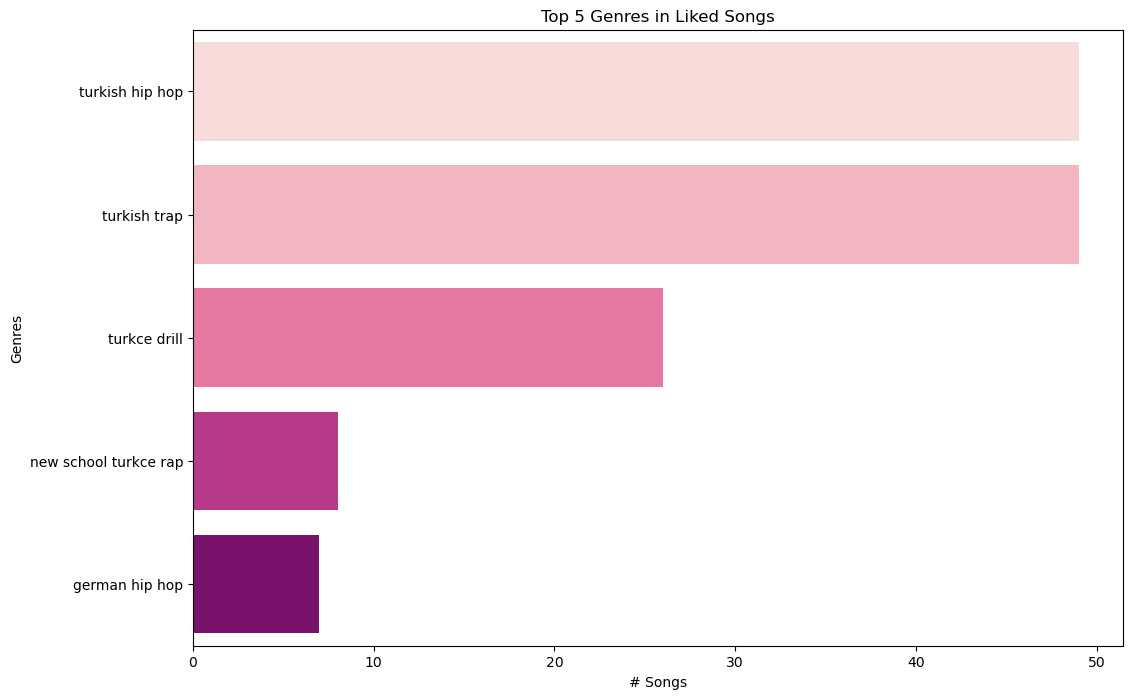

In [89]:
genre_lists = df['Genres'].dropna().str.split(', ')
all_genres = list(itertools.chain(*genre_lists))
genre_counts = Counter(all_genres)

# top 5
top5genres = dict(genre_counts.most_common(5))

plt.figure(figsize=(12, 8))
sns.barplot(x=list(top5genres.values()), y=list(top5genres.keys()), palette='RdPu')
plt.title('Top 5 Genres in Liked Songs')
plt.xlabel('# Songs')
plt.ylabel('Genres')
plt.show()

---
Top 5 Artists

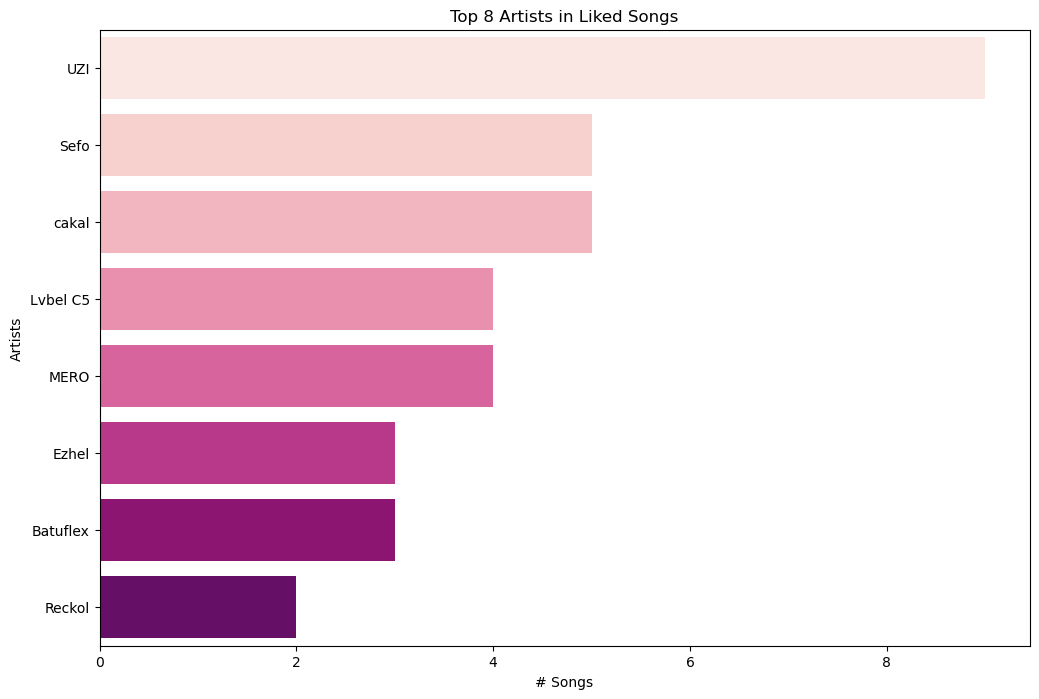

In [90]:
artist_counts = df['Artist'].value_counts()
top8artists = artist_counts.head(8)

plt.figure(figsize=(12, 8))
sns.barplot(x=top8artists.values, y=top8artists.index, palette='RdPu')
plt.title('Top 8 Artists in Liked Songs')
plt.xlabel('# Songs')
plt.ylabel('Artists')
plt.show()

---
Creating new column named Primary Genre for some of the analysis, then looking into Genre Distribution and Primary Sub-Genre Distribution

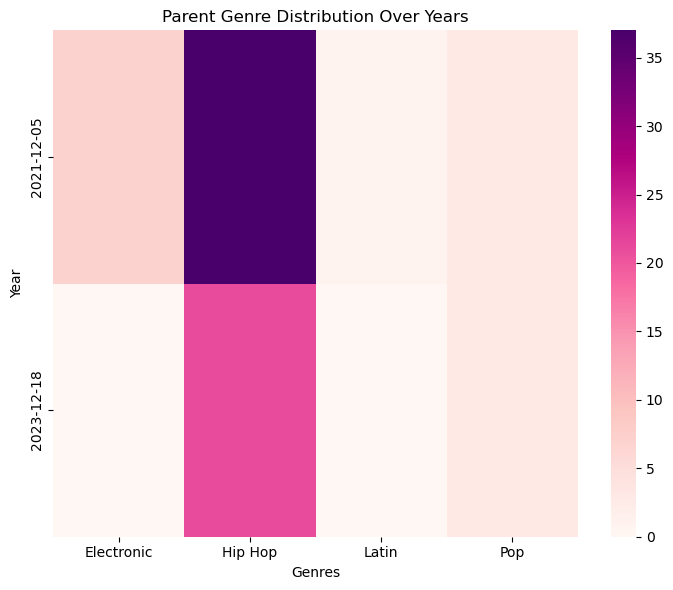

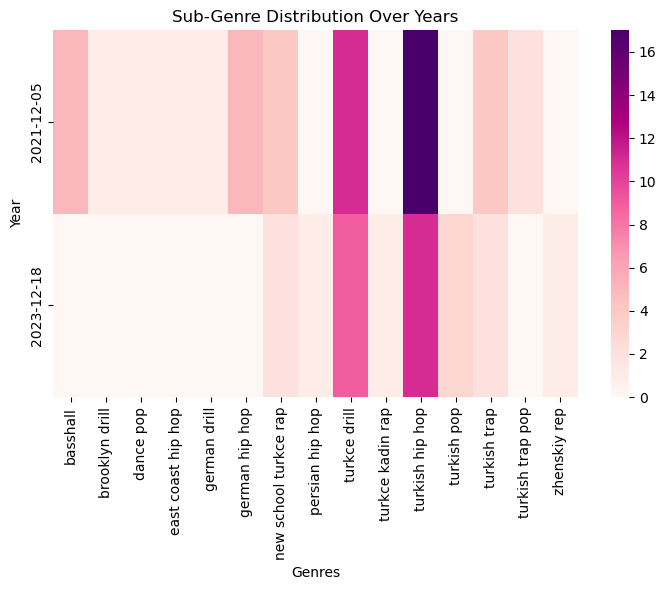

In [92]:
df['Parent Genres'] = df['Parent Genres'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else x)

genre_trendspar = df.groupby('Added At')['Parent Genres'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.heatmap(genre_trendspar, cmap="RdPu")
plt.title('Parent Genre Distribution Over Years')
plt.xlabel('Genres')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


df['Primary Genre'] = df['Genres'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else x)

genre_trendsprim = df.groupby('Added At')['Primary Genre'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.heatmap(genre_trendsprim, cmap="RdPu")
plt.title('Sub-Genre Distribution Over Years')
plt.xlabel('Genres')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


---
Do I tend to choose more popular songs since I created this playlist?

Text(0, 0.5, 'Average Popularity')

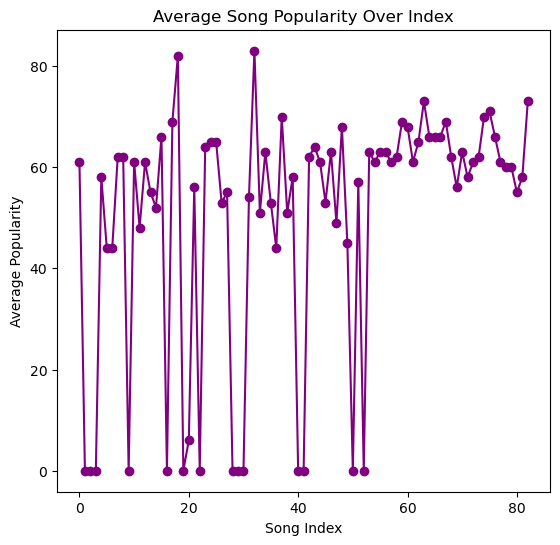

In [93]:
df['Added At'] = pd.to_datetime(df['Added At'])

popularity_trend = df.groupby('Added At')['Popularity'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['Popularity'].plot(kind='line', marker='o', color='Purple')
plt.title('Average Song Popularity Over Index')
plt.xlabel('Song Index')
plt.ylabel('Average Popularity')

---
Let's see how BPM of these songs changed over time.

Text(0, 0.5, 'Average BPM')

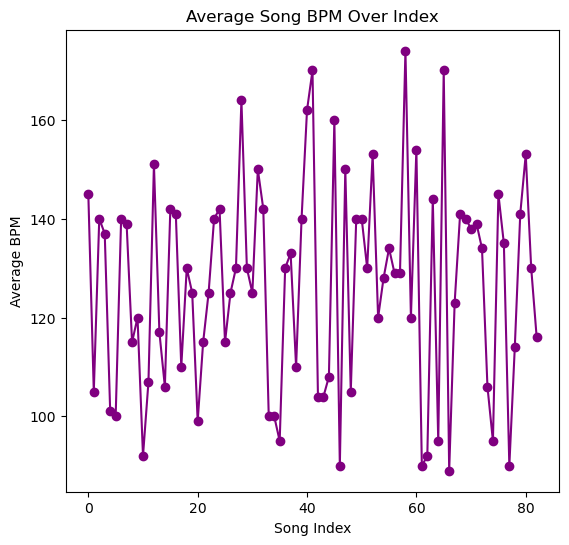

In [94]:
bpmtrend = df.groupby('Added At')['BPM'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['BPM'].plot(kind='line', marker='o', color='Purple')
plt.title('Average Song BPM Over Index')
plt.xlabel('Song Index')
plt.ylabel('Average BPM')

---
Now let's see how loudness changed when kept adding more songs to my playlist. 

Text(0, 0.5, 'Average BPM')

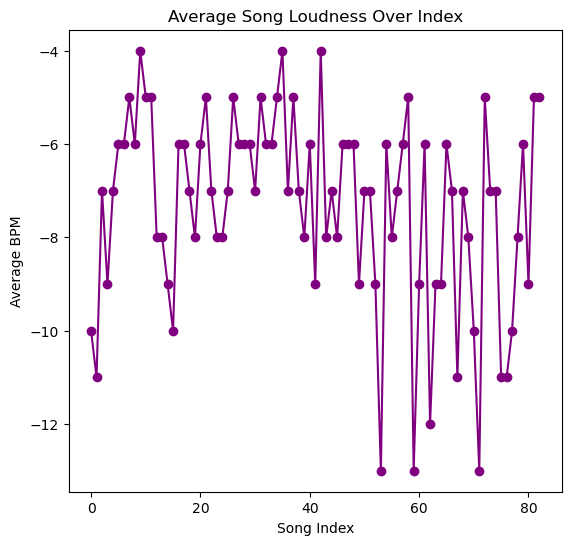

In [95]:
loudtrend = df.groupby('Added At')['Loud'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['Loud'].plot(kind='line', marker='o', color='Purple')
plt.title('Average Song Loudness Over Index')
plt.xlabel('Song Index')
plt.ylabel('Average BPM')

---
Time to see the if Popularity-BPM-Loud has a correlation between them

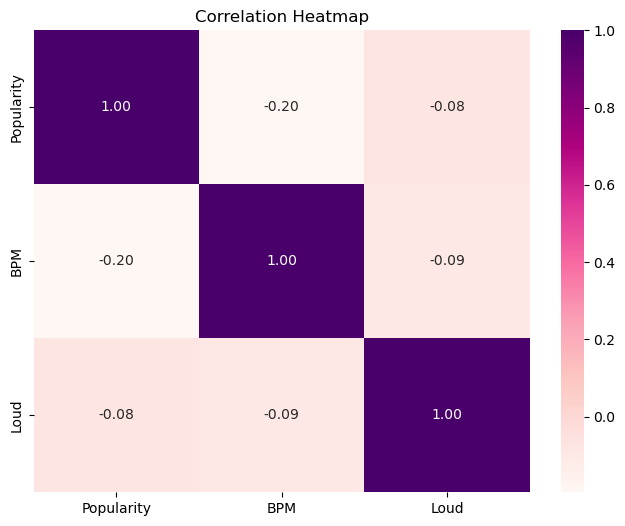

In [96]:
numerical_features = ['Popularity', 'BPM', 'Loud']

features_to_analyze = [feature for feature in numerical_features if feature in df.columns]

correlation_matrix = df[features_to_analyze].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


---
Time to delve deeper into the Genres I like most

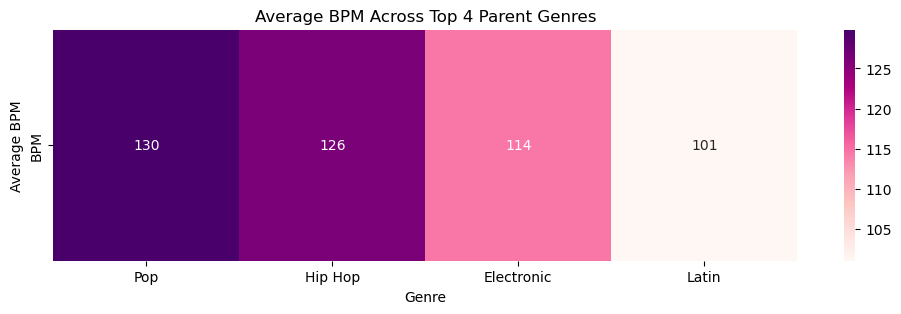

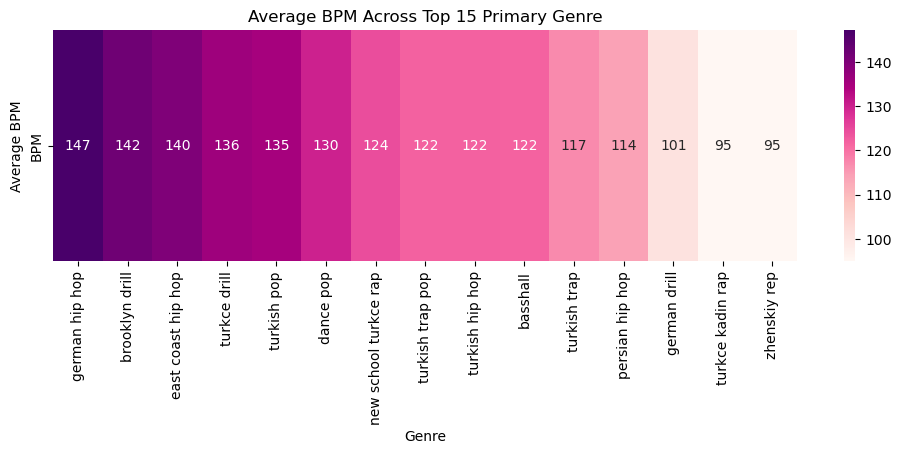

In [97]:
mean_bpm_per_genre = df.groupby('Parent Genres')['BPM'].mean().sort_values(ascending=False)

bpm_heatmap_data = mean_bpm_per_genre.to_frame().T

plt.figure(figsize=(12, 3))
sns.heatmap(bpm_heatmap_data, cmap="RdPu", annot=True, fmt=".0f")
plt.title('Average BPM Across Top 4 Parent Genres')
plt.xlabel('Genre')
plt.ylabel('Average BPM')
plt.show()


mean_bpm_per_genre = df.groupby('Primary Genre')['BPM'].mean().sort_values(ascending=False)

bpm_heatmap_data = mean_bpm_per_genre.to_frame().T

plt.figure(figsize=(12, 3))
sns.heatmap(bpm_heatmap_data, cmap="RdPu", annot=True, fmt=".0f")
plt.title('Average BPM Across Top 15 Primary Genre')
plt.xlabel('Genre')
plt.ylabel('Average BPM')
plt.show()


---
Now, time to see my top 5 artist's BPM, Popularity and Loudness analysis

Top 5 Artist:
                 BPM  Popularity      Loud
Artist                                    
Lvbel C5  130.500000   62.500000 -8.750000
MERO      159.000000    0.000000 -7.000000
Sefo      120.600000   48.200000 -5.800000
UZI       113.777778   62.888889 -6.222222
cakal     135.000000   36.800000 -6.400000


/var/folders/ck/hl0bm7bx7pjb6v65rqz4__sc0000gn/T/ipykernel_23619/3412951710.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artist_analysis = data_top_artists.groupby('Artist')['BPM', 'Popularity', 'Loud'].mean()


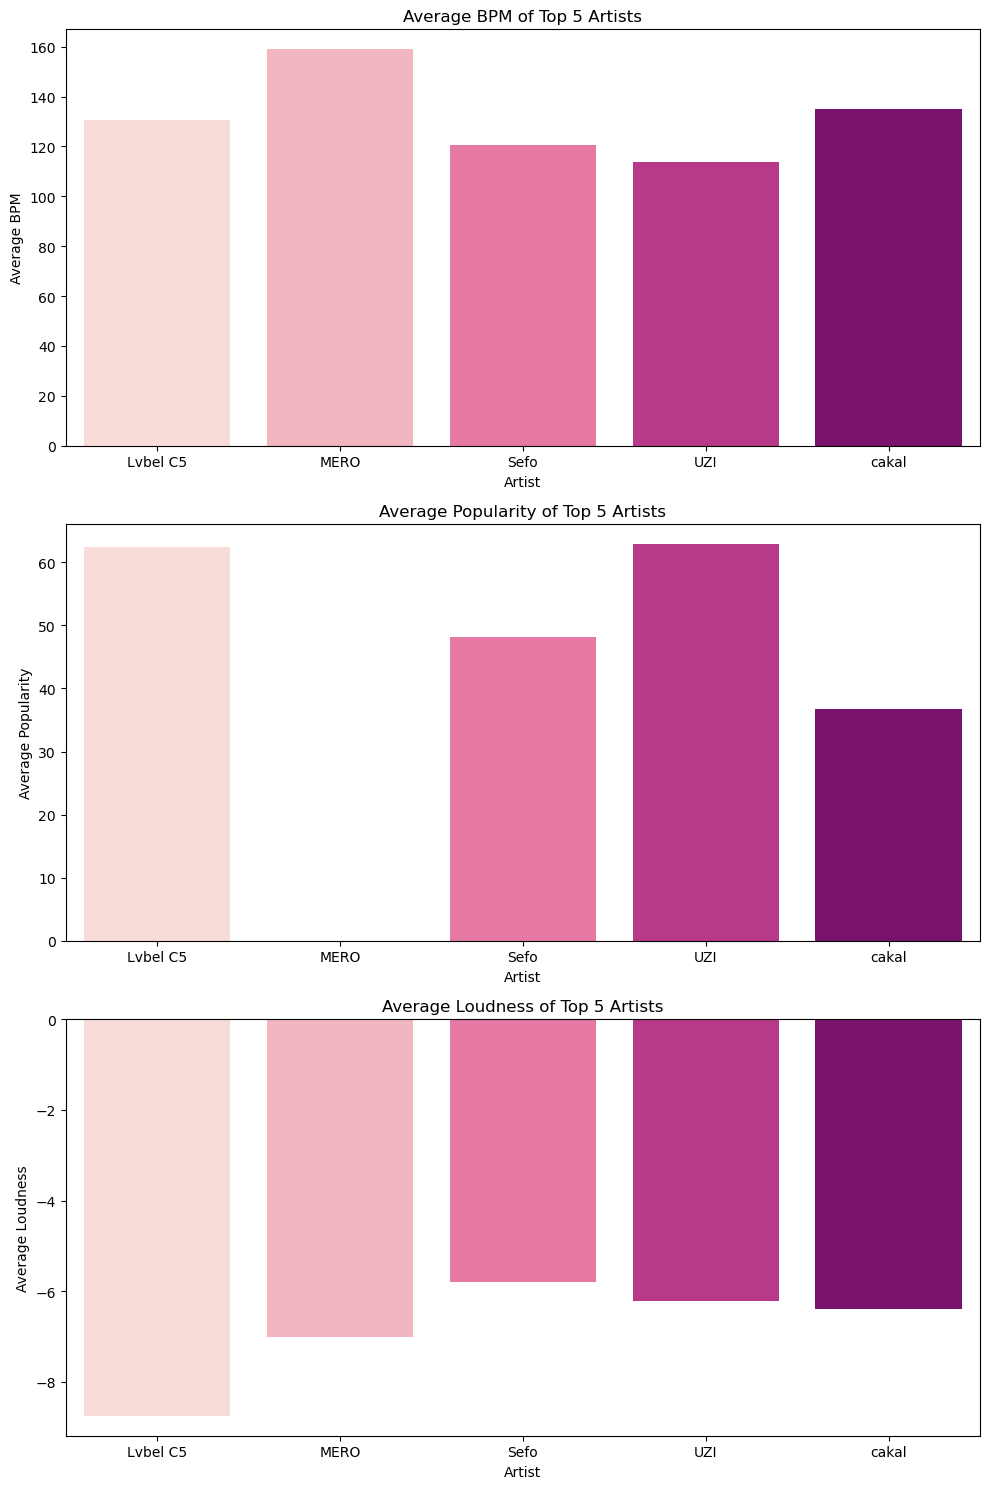

In [98]:
top_artists = df['Artist'].value_counts().head(5).index

data_top_artists = df[df['Artist'].isin(top_artists)]

artist_analysis = data_top_artists.groupby('Artist')['BPM', 'Popularity', 'Loud'].mean()

print("Top 5 Artist:")
print(artist_analysis)


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x=artist_analysis.index, y='BPM', data=artist_analysis, ax=axes[0], palette="RdPu")
axes[0].set_title('Average BPM of Top 5 Artists')
axes[0].set_ylabel('Average BPM')

sns.barplot(x=artist_analysis.index, y='Popularity', data=artist_analysis, ax=axes[1], palette="RdPu")
axes[1].set_title('Average Popularity of Top 5 Artists')
axes[1].set_ylabel('Average Popularity')

sns.barplot(x=artist_analysis.index, y='Loud', data=artist_analysis, ax=axes[2], palette="RdPu")
axes[2].set_title('Average Loudness of Top 5 Artists')
axes[2].set_ylabel('Average Loudness')

plt.tight_layout()
plt.show()


Guessing my most beloved songs by bpm, artist, genre analysis - ML implementation
---

Creating a 10 song playlist that mostly matches my taste by using machine learning and its accuracy


---
Labeling & Preparation

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['Top Song'] = df.apply(lambda x: 1 if (115 < x['BPM'] < 155) and 
                              ('Hip Hop' in str(x['Parent Genres'])) else 0, axis=1)

label_distribution = df['Top Song'].value_counts()

label_distribution


0    52
1    31
Name: Top Song, dtype: int64

---
Training a Model for our 10 songs playlist

In [100]:
# features
features = ['BPM', 'Artist', 'Primary Genre']

# One-hot encoding for 'Artist' and 'Primary Genre'
data_prepared = pd.get_dummies(df[features])
data_prepared['Top Song'] = df['Top Song']  # target variable

X = data_prepared.drop('Top Song', axis=1)
y = data_prepared['Top Song']

# Standardizing the 'BPM' feature
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled['BPM'] = scaler.fit_transform(X[['BPM']])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((58, 69), (25, 69), (58,), (25,))

-> Training set: 58 samples, Testing set: 25 samples, Number of features (OH-Encoded): 69

---
Now predicting

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting 
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report
print("Accuracy: ", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Report: ")
print(class_report)



Accuracy:  0.8
Confusion Matrix:
[[13  2]
 [ 3  7]]
Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.78      0.70      0.74        10

    accuracy                           0.80        25
   macro avg       0.80      0.78      0.79        25
weighted avg       0.80      0.80      0.80        25



As a Final Task - Creating 10 Song Playlist
---

---
The playlist includes 1 false positive top song just to match its accuracy, it is the last one :)

In [102]:
test_indices = X_test.index

true_positives = test_indices[(y_pred == 1) & (y_test == 1)]
false_positives = test_indices[(y_pred == 1) & (y_test == 0)]

selected_songs_indices = true_positives.tolist() + false_positives[:1].tolist()

playlist = df.loc[selected_songs_indices, ['Song', 'Artist', 'BPM', 'Primary Genre']]

playlist


,Song,Artist,BPM,Primary Genre
30,GECELERİN DERDİ,BEGE,125,turkce drill
0,Dünya Hain,Batuflex,145,turkish hip hop
12,Hayrola,"Artz,Bugy,Ezhel",151,turkish hip hop
49,Hayrane,Reo Manchs,140,new school turkce rap
70,İllegale,Batuflex,138,turkish hip hop
67,TALIBANA,"DEHA INC.,Reckol",123,new school turkce rap
56,Sarıl Bana,"Velet,Dilan",129,turkish hip hop
69,Perros Blancos,"Reckol,cakal",140,turkce drill
